**TRABAJO INTEGRADOR FINAL CURSO DATA SCIENCE / 2024 / MARÍA MILAGROS PALUD**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline


**TEMA: FINANZAS**

Objetivo: explorar los factores que influyen en el precio de las acciones de TESLA implementando aprendizaje automático a partir de un conjunto de datos histórico.

INVESTIGACIÓN:

¿Qué es TESLA?
Tesla es una empresa estadounidense conocida por su enfoque en la fabricación de vehículos eléctricos, sistemas de almacenamiento de energía y tecnologías relacionadas con la energía renovable. La cara visible de la misma es el excentrico Elon Musk, quien a su vez es el dueño de la red social X (ex twitter).
La visión de Tesla es acelerar la transición mundial hacia la energía sostenible, ofreciendo productos que no solo sean respetuosos con el medio ambiente, sino también atractivos en términos de rendimiento y diseño. La compañía ha sido un líder en la industria de los vehículos eléctricos y ha desempeñado un papel importante en la popularización de esta tecnología.
La empresa TESLA cotiza en bolsa bajo el signo TSLA.
Durante mi investigación buscaré predecir si el precio de las acciones sufrirán o no un aumento.





In [4]:
data = pd.read_csv("/content/TSLA.csv")

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


El conjunto de datos proporcionado contiene indicadores del comportamiento de una acción en función del día.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


De esta primera observación puede concluirse que en todos los casos (salvo en volumen) la media es menor a la mediana, esto nos indica distribuciones sesgadas hacia la izquierda.
En el caso de close y volume, al analizar el mínimo, el máximo y la media se puede ver una gran dispersión de los datos.
En el caso del volumen, la media es levemente mayor a la mediana y por lo tanto presenta una distribución sesgada hacia la derecha.

Por otro lado, en todas las variables puede suponerse la presencia de outliers. Esta conclusión surge de la observación de la media,el mínimo y el máximo.

Investigación:

Si "close" y "adj close" son iguales, significa que no ha habido ningún evento corporativo que requiera ajuste en el precio de cierre. Esto podría deberse a que no se han pagado dividendos, no ha habido divisiones de acciones u otros eventos que requieran ajuste en el precio de cierre. En resumen, cuando "close" es igual a "adj close", no hay diferencia entre el precio de cierre y el precio de cierre ajustado, lo que indica que el precio de cierre refleja el valor final de la acción para ese día sin necesidad de ajustes adicionales.

Adicionalmente los indicadores estadísticos de la variable close se encuentran muy cercanos a los de high:

Investigación:

El hecho de que el precio máximo esté cerca del precio de cierre puede ser interpretado de diferentes maneras por los inversores y analistas del mercado:

Indicación de fuerza inicial seguida de debilidad: Puede sugerir que aunque la acción experimentó un fuerte impulso alcista inicial, no pudo mantener ese impulso y retrocedió hacia el cierre, lo que podría ser interpretado como una señal de debilidad en el corto plazo.

Indicación de resistencia: Si el precio máximo está muy cerca del precio de cierre, podría indicar que hay una fuerte resistencia en el mercado alrededor de ese nivel de precio, lo que podría dificultar que la acción suba aún más en el futuro.

Potencial de reversión: Dependiendo del contexto y de otros factores, este patrón también podría ser interpretado como una señal de que la acción está cerca de revertir su dirección y comenzar a declinar, especialmente si el precio de cierre se encuentra en la parte superior del rango de precios del día.

Empiezo analizando el precio de cierre de la acción

Con el IQR veo la cantidad de outliers

In [ ]:
#Calculo el percentil 1 y el 3
Q1 = np.percentile(data['Close'], 25)
Q3 = np.percentile(data['Close'], 75)
IQR = Q3 - Q1
#Calculo los limites que me da el iqr
limsup = (Q3 + 1.5*IQR)
liminf = Q1 - 1.5*IQR

print("Primer cuartil (Q1):", Q1)
print("Tercer cuartil (Q3):", Q3)
print("Rango intercuartílico (IQR):", IQR)
print("Limite superior (limsup):", (Q3 + 1.5*IQR))
print("Limite inferior (liminf):",(Q1 - 1.5*IQR))

#Cuento la cantidad de valores sobre limsup para ver el número de outliers:
umbral = limsup
conteo = (data['Close']>limsup).sum()+(data['Close']<liminf).sum()

print("Cantidad de outliers",conteo)


Primer cuartil (Q1): 34.400002
Tercer cuartil (Q3): 266.774994
Rango intercuartílico (IQR): 232.374992
Limite superior (limsup): 615.3374819999999
Limite inferior (liminf): -314.16248599999994
Cantidad de outliers 3


La variable Close tiene solo tres valores fuera del IQR

<Axes: ylabel='Close'>

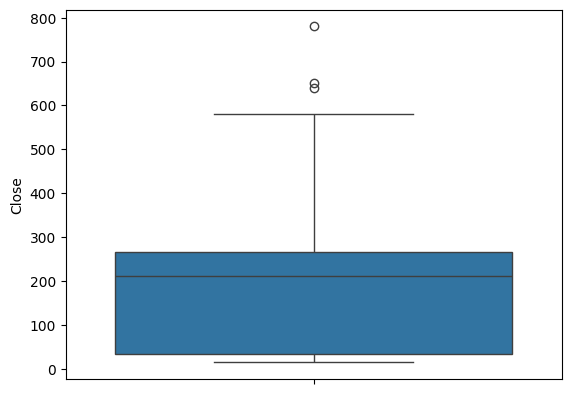

In [ ]:
sns.boxplot(data['Close'])

Efectuo el calculo del coeficiente de variación para analizar la variabilidad de close.

Investigación:

-Si el CV es bajo (por ejemplo, cercano al 0%), indica que los datos tienen poca variabilidad en relación con su media. Esto sugiere que los datos están bastante concentrados alrededor de la media.

-Si el CV es alto (por ejemplo, mayor que el 15-20%), indica que los datos tienen una alta variabilidad en relación con su media. Esto sugiere que los datos están más dispersos alrededor de la media.

In [ ]:
#Calculo el coeficiente de variación para Close.
mediaclose = np.mean(data['Close'])
desvclose = np.std(data['Close'])
cv = (desvclose/mediaclose)*100
print("CV: ",cv)

CV:  63.89969364421806


Con un coeficiente aproximado de 64% podemos inferir una variabilidad grande de los datos.

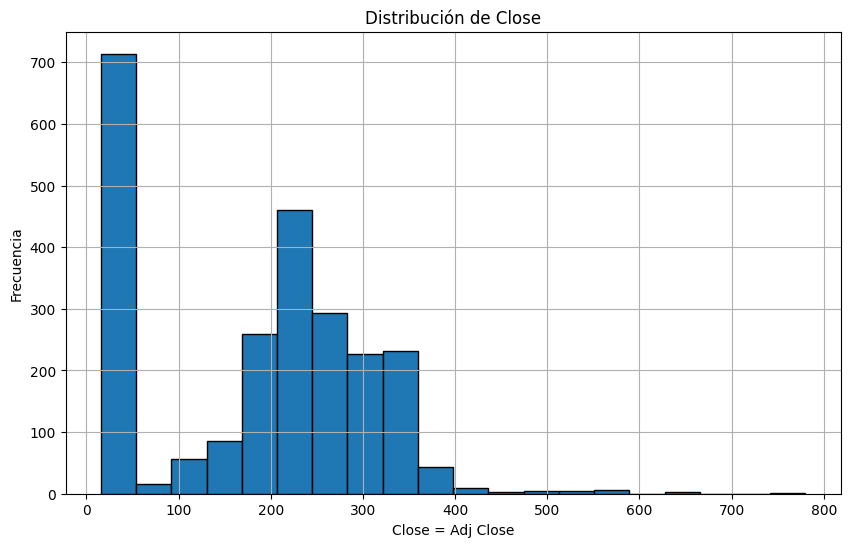

In [ ]:
plt.figure(figsize=(10, 6))
data['Close'].hist(bins=20, edgecolor='black')
plt.xlabel('Close = Adj Close')
plt.ylabel('Frecuencia')
plt.title('Distribución de Close')
plt.grid(True)
plt.show()

Al observar la distribución veo que se encuentra más sesgada hacia la izquierda aunque la media sea menor a la mediana, se observa una gran cola a la izquierda lo que explica el alto coeficiente de variabilidad.
Adicionalmente puede verse que los precios de cierre de las acciones son con mayor frecuencia bajos.

Text(0.5, 1.0, 'Precio de a lo largo del tiempo')

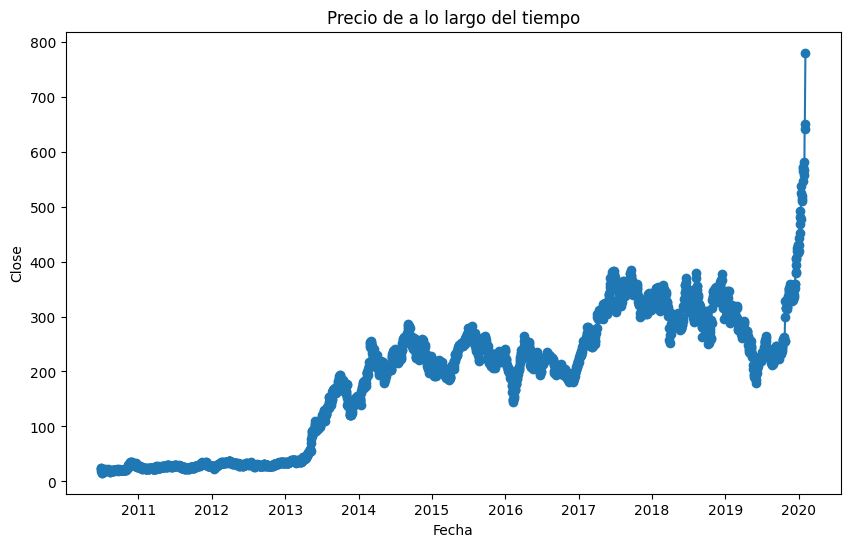

In [ ]:
df = pd.DataFrame(data)

# Convertir la columna 'Date' al tipo de dato datetime si no está en ese formato
df['Date'] = pd.to_datetime(df['Date'])

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-')

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.title('Precio de a lo largo del tiempo')

El precio de cierre de las acciones de TESLA creció a lo largo del tiempo teniendo un fuerte salto en el año 2020. En un contexto de pandemia, como lo fue el 2020, ¿Porqué se produjo este salto tan grande?

Investigación:

Los diarios y medios de comunicación indican que hay numerosas razones por las que Tesla aumentó sus acciones en gran medida durante el 2020. A continuación se adjuntan algunas de las mismas:
-En el año 2020 la empresa entregó una mayor cantidad de autos y lanzó un nuevo modelo antes de lo previsto.

-Debido a políticas medioambientales de emisiones cero, los vehiculos eléctricos estuvieron en auge durante este año.

-El factor mas importante a mi parecer fue un split de acciones realizado por TESLA en el 2020. Durante este año se efectuó una división 5 en 1, esto puede causar los siguientes efectos:

Percepción de valor: Los splits de acciones pueden interpretarse como una señal positiva por parte de los inversores, lo que puede llevar a un aumento en la demanda de las acciones y, por lo tanto, a un aumento en su precio.

Aumento de la liquidez: Si el split de acciones atrae a más inversores, podría aumentar la liquidez del mercado, lo que a su vez podría impulsar el precio de las acciones.

Confianza en el crecimiento futuro: Una empresa que realiza un split de acciones a menudo lo hace porque cree que su valor está en aumento y que las acciones seguirán apreciándose en el futuro. Esta confianza puede ser compartida por los inversores, lo que puede llevar a un aumento del precio de las acciones.

Empiezo con un análisis de la variable volumen.

<Axes: ylabel='Volume'>

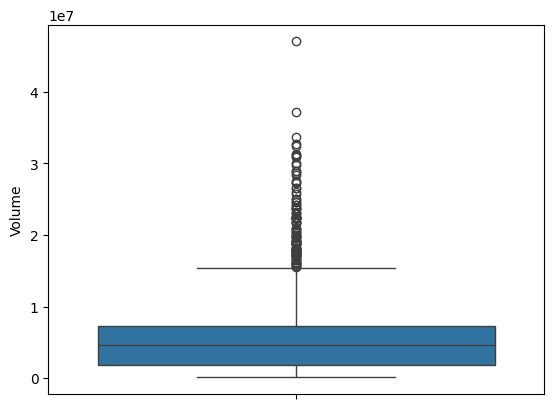

In [ ]:
sns.boxplot(data['Volume'])

La variable "volumen" tiene mucha mayor cantidad de outliers que la variable "close".

In [ ]:
#Calculo el percentil 1 y el 3
Q1 = np.percentile(data['Volume'], 25)
Q3 = np.percentile(data['Volume'], 75)
IQR = Q3 - Q1
#Calculo los limites que me da el iqr
limsup = (Q3 + 1.5*IQR)
liminf = Q1 - 1.5*IQR

print("Primer cuartil (Q1):", Q1)
print("Tercer cuartil (Q3):", Q3)
print("Rango intercuartílico (IQR):", IQR)
print("Limite superior (limsup):", (Q3 + 1.5*IQR))
print("Limite inferior (liminf):",(Q1 - 1.5*IQR))

#Cuento la cantidad de valores sobre limsup para ver el número de outliers:
umbral = limsup
conteo = (data['Volume']>limsup).sum()+(data['Volume']<liminf).sum()

print("Cantidad de outliers",conteo)

Primer cuartil (Q1): 1899275.0
Tercer cuartil (Q3): 7361150.0
Rango intercuartílico (IQR): 5461875.0
Limite superior (limsup): 15553962.5
Limite inferior (liminf): -6293537.5
Cantidad de outliers 110


Efectivamente "Volume" tiene 110 outliers y como veremos a continuación se encuentra sesgada hacia la derecha, esto explica que la media sea mayor a la mediana. No efectuo la eliminación de outlier ni de "Close" ni de "Volume" ya que considero que los mismos son valores atípicos pero no erroneos. No quisiera perder estos datos de mi set ya que me podrían estar indicando el momento donde se produce el alza en el precio de las acciones, factor que deseo estudiar.

In [ ]:
#Al igual que con close calculo el cv:
mediavol = np.mean(data['Volume'])
desvvol = np.std(data['Volume'])
cv = (desvvol/mediavol)*100
print("CV: ",cv)

CV:  89.48548085320456


La variable volumen presenta mayor CV que close, esto indica una mayor variabilidad. Este aspecto se pone de manifiesto con la simple observación del boxplot más arriba.

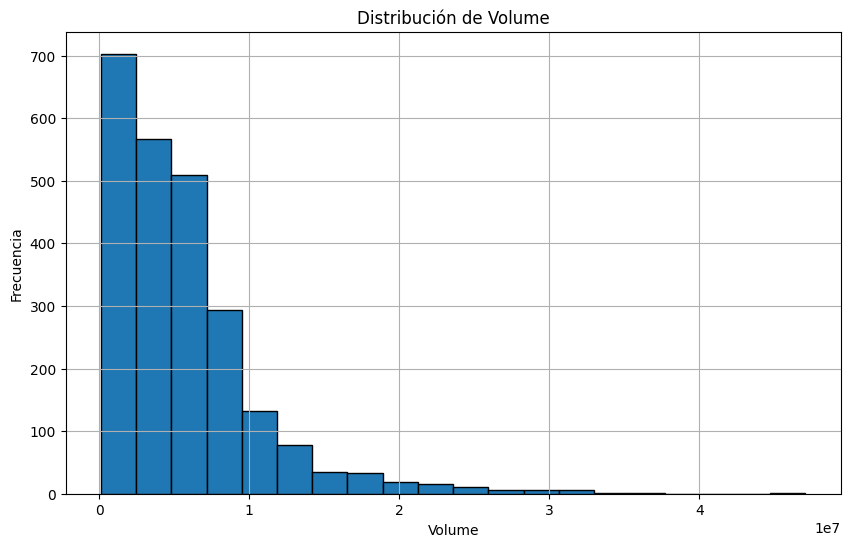

In [ ]:
plt.figure(figsize=(10, 6))
data['Volume'].hist(bins=20, edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frecuencia')
plt.title('Distribución de Volume')
plt.grid(True)
plt.show()


La distribución del volumen muestra que la mayor cantidad de valores de volumen de negociación de acciones son bajos. Por otro lado, se ve una con una cola hacía la izquierda como bien lo inferimos al comparar la media y la mediana.

Text(0.5, 1.0, 'Volumen de negociación a lo largo del tiempo')

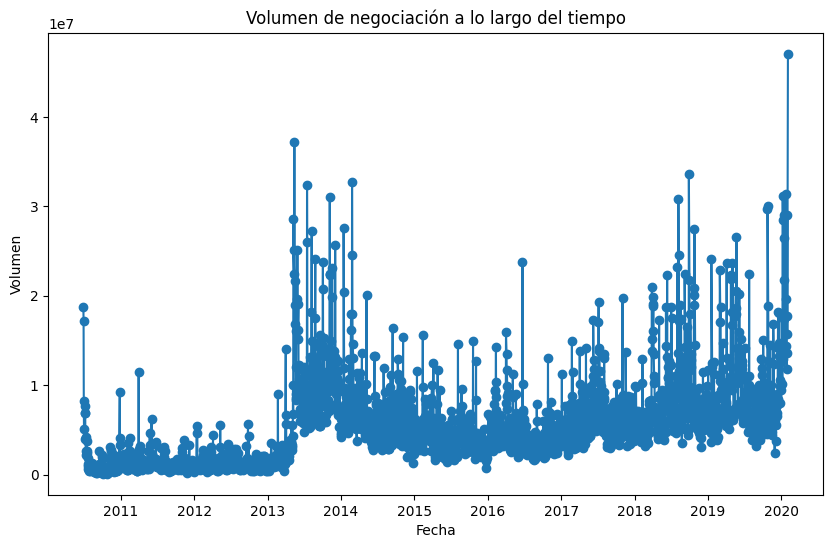

In [ ]:
df = pd.DataFrame(data)

df['Date'] = pd.to_datetime(df['Date'])

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], marker='o', linestyle='-')

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Volumen de negociación a lo largo del tiempo')


Como puede verse el volumen de negociación efectivamente creció a lo largo del tiempo. Puede observarse que el momento donde el volumen hace un salto (año 2020) se condice con el momento donde el precio levanta abruptamente.
Es probable que como el volumen negociado de una acción puede traducirse como "la demanda de esa acción", una suba en dicha variable impacte directamente en una suba en el precio simplemente por oferta-demanda.

Investigación:

El indicador On-Balance Volume (OBV) mide la presión de compra y venta como un indicador acumulativo que suma el volumen en días de alza y resta el volumen en días de baja.

Si el valor del activo cierra más alto que el cierre anterior, todo el volumen del día se considera volumen al alza.

Si el valor del activo cierra más bajo que el cierre anterior, todo el volumen del día se considera volumen a la baja.
Si el precio de la acción sube y el OBV también lo hace entonces tenemos una tendencia alcista.


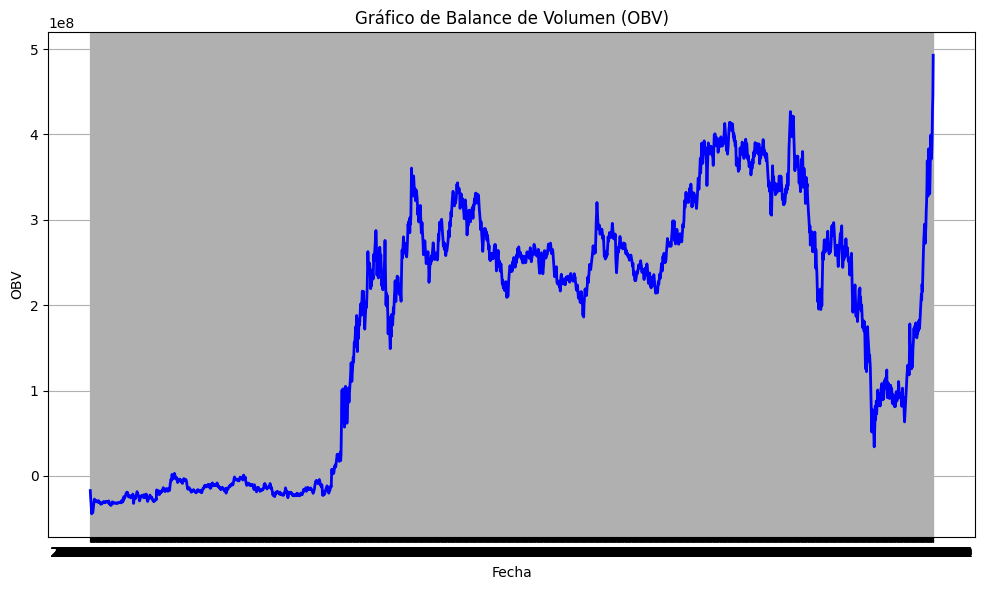

In [ ]:
#Mediante este codigo proporcionado por chatGPT grafico el indicador OBV
# Calcula el cambio de precio diario
#data = df
data['Change'] = data['Close'].diff()

# Asigna el volumen a 1 si el cambio de precio es positivo y -1 si es negativo
data['Direction'] = pd.cut(data['Change'], bins=[-float("inf"), 0, float("inf")], labels=[-1, 1])

# Convierte la columna 'Direction' a tipo numérico
data['Direction'] = data['Direction'].astype(float)

# Calcula el cambio de volumen diario multiplicado por la dirección del precio
data['OBV'] = (data['Volume'] * data['Direction']).cumsum()

# Grafica el OBV
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['OBV'], color='blue', lw=2)
plt.xlabel('Fecha')
plt.ylabel('OBV')
plt.title('Gráfico de Balance de Volumen (OBV)')
plt.grid(True)
plt.tight_layout()
plt.show()

El OBV muestra una tendencia muy similar a la del precio en función del tiempo, por esta razón podria intentarse la predicción del precio de la acción con el OBV. Si el mismo viene en alza, entonces el precio también seguirá esta tendencia.

**ELECCIÓN DEL MODELO:**

Para el estudio de la evolución del precio de las acciones de TESLA utilizaré un modelo de series de tiempo. Mediante el mismo analizaré la tendencia seguida por los indicadores Close y Volume buscaré predecir como se comportará la acción durante el tiempo. Si los indicadores tienen una tendencia positiva, indica un aumento de precio en el mercado, esto podría verse como un incentivo para realizar la compra de las acciones.

POSTERIORMENTE HABÍA PROPUESTO UTILIZAR EL INDICADOR OBV PERO POR SIMPLICIDAD UTILIZO LOS PARÁMETROS CLOSE Y VOLUME.

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


FEATURE SELECTION:

In [ ]:
#Empezaré por eliminar la columna adj close ya que está duplicada
data2 = data.T
data2.shape
data2.duplicated().sum()
data = data2.drop_duplicates(keep ="first").T
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2416 non-null   object
 1   Open    2416 non-null   object
 2   High    2416 non-null   object
 3   Low     2416 non-null   object
 4   Close   2416 non-null   object
 5   Volume  2416 non-null   object
dtypes: object(6)
memory usage: 113.4+ KB


,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.0,25.0,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.83,17187100
2,2010-07-01,25.0,25.92,20.27,21.959999,8218800
3,2010-07-02,23.0,23.1,18.709999,19.200001,5139800
4,2010-07-06,20.0,20.0,15.83,16.110001,6866900


FEATURE SCALING


In [ ]:
#Mis dos datos más importantes son Close y Volume por lo que busco llevarlos a una escala en común.
# Selecciona solo las columnas que deseas escalar
columnas_a_escalar = ['Close', 'Volume']
data_a_escalar = data[columnas_a_escalar]

#Utilizo la técnica de normalización ya que no tienen una distribución normal.

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador a tus datos
scaler.fit(data_a_escalar)

# Aplica la transformación a tus datos
data[columnas_a_escalar] = scaler.transform(data_a_escalar)

# Ahora las columnas 'close' y 'volume' en 'data' estarán escaladas entre 0 y 1
print(data.head())  # Imprime las primeras filas del conjunto de datos para verificar

         Date       Open   High        Low     Close    Volume
0  2010-06-29       19.0   25.0  17.540001  0.010586  0.397214
1  2010-06-30  25.790001  30.42  23.299999  0.010508  0.363576
2  2010-07-01       25.0  25.92      20.27  0.008061  0.172543
3  2010-07-02       23.0   23.1  18.709999  0.004449  0.106958
4  2010-07-06       20.0   20.0      15.83  0.000406  0.143747


GRID SEARCH: Utilizaré para encontrar los mejores parámetros para mi modelo SVR

In [6]:
# Seleccionar solo la columna 'Close' (precio de cierre) para el análisis
data = data[['Close']]

# Crear una nueva columna 'Target' que contenga los precios de cierre desplazados un día hacia adelante
data['Target'] = data['Close'].shift(-1)

# Eliminar filas con valores faltantes (NaN) que se generaron debido al desplazamiento
data.dropna(inplace=True)

# Dividir los datos en características (X) y etiquetas (y)
X = data[['Close']]
y = data['Target']

#Definimos el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos un pipeline con un escalador y un modelo SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Definimos los parámetros que queremos probar en el GridSearch
parameters = {
    'svr__C': [0.1, 1, 10,100],
    'svr__gamma': [0.1, 0.01, 0.001],
    'svr__epsilon': [0.1, 0.01, 0.001]
}

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)

# Ajustamos el GridSearch a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros en el conjunto de prueba
best_svr = grid_search.best_estimator_
test_score = best_svr.score(X_test, y_test)
print("Score en conjunto de prueba:", test_score)

Mejores parámetros encontrados:
{'svr__C': 100, 'svr__epsilon': 0.1, 'svr__gamma': 0.001}
Score en conjunto de prueba: 0.9968520768118335


APLICACIÓN DEL MODELO SVR PARA PREDECIR EL CLOSE (con datos escalados)

In [ ]:
# Seleccionar solo la columna 'Close' (precio de cierre) para el análisis
data = data[['Close']]

# Crear una nueva columna 'Target' que contenga los precios de cierre desplazados un día hacia adelante
data['Target'] = data['Close'].shift(-1)

# Eliminar filas con valores faltantes (NaN) que se generaron debido al desplazamiento
data.dropna(inplace=True)

# Dividir los datos en características (X) y etiquetas (y)
X = data[['Close']]
y = data['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de SVR
model = SVR(kernel='linear', C=100, epsilon=0.1)
model.fit(X_train, y_train)

# Predecir los precios de cierre en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Close Price')
plt.ylabel('Next Day Close Price')
plt.title('SVR Prediction of Stock Prices')
plt.legend()
plt.show()

In [ ]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8364221359021056


In [ ]:
#Verificación del overfitteo
#Primero calculo los ypred con los datos de entrenamiento
y_pred_train = model.predict(X_train)
#Calculo el error entre los valores reales de entrenamiento la variable objetivo
#y las predicciones realizadas por el modelo con los mismos datos de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
print("Error cuadrático medio (MSE) entre y_train e y_pred_train:", mse_train)
mse2 = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) entre y_test e y_pred:", mse2)

Error cuadrático medio (MSE) entre y_train e y_pred_train: 0.004365580834656678
Error cuadrático medio (MSE) entre y_test e y_pred: 0.004287242119533348


ANALIZO SI LA ACCURACY MEJORA SIN ESCALAR LOS DATOS

<ipython-input-5-a5478909d0e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)
<ipython-input-5-a5478909d0e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


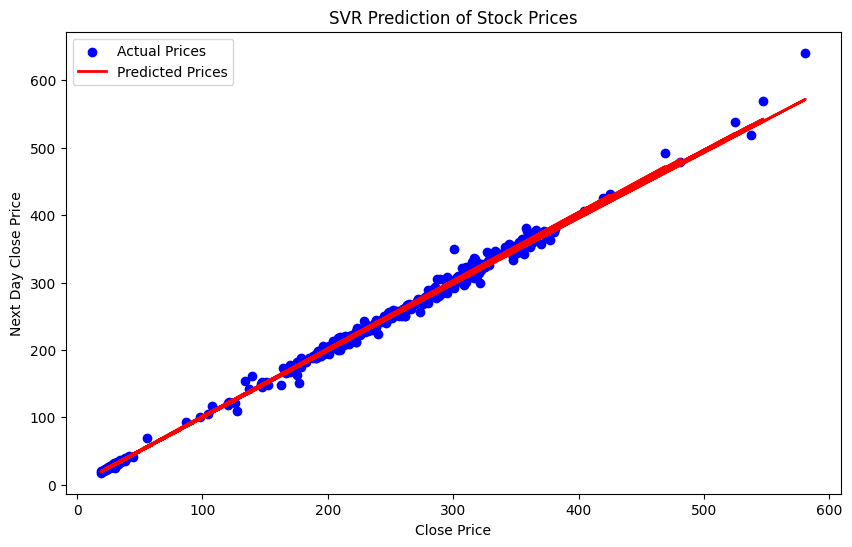

In [5]:
# Seleccionar solo la columna 'Close' (precio de cierre) para el análisis
data = data[['Close']]

# Crear una nueva columna 'Target' que contenga los precios de cierre desplazados un día hacia adelante
data['Target'] = data['Close'].shift(-1)

# Eliminar filas con valores faltantes (NaN) que se generaron debido al desplazamiento
data.dropna(inplace=True)

# Dividir los datos en características (X) y etiquetas (y)
X = data[['Close']]
y = data['Target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de SVR
model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train, y_train)

# Predecir los precios de cierre en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Close Price')
plt.ylabel('Next Day Close Price')
plt.title('SVR Prediction of Stock Prices')
plt.legend()
plt.show()

In [ ]:
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9971035991215694


SE OBSERVA QUE EL MODELO MEJORA MUCHO CON LOS DATOS NO ESCALADOS.
Como puede suponerse un overfitting, se evalúa mediante una comparación de ypred con ytrain y de ypred con ytest.

In [ ]:
#Verificación del overfitteo
#Primero calculo los ypred con los datos de entrenamiento
y_pred_train = model.predict(X_train)
#Calculo el error entre los valores reales de entrenamiento la variable objetivo
#y las predicciones realizadas por el modelo con los mismos datos de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
print("Error cuadrático medio (MSE) entre y_train e y_pred_train:", mse_train)
mse2 = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) entre y_test e y_pred:", mse2)

Error cuadrático medio (MSE) entre y_train e y_pred_train: 49.58296831088675
Error cuadrático medio (MSE) entre y_test e y_pred: 44.41223789192649


Como podemos ver el modelo presenta un rendimiento levemente inferior con los datos de entrenamiento por lo que no podemos suponer que haya overfitteo.
Algo muy similar ocurre más arriba al realizar la misma prueba con los datos escalados.
